# ADABoost

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('Data/titanic_train.csv')

In [4]:
test = pd.read_csv('Data/titanic_test.csv')

In [5]:
df = pd.concat([train, test], sort = False)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(value=df['Age'].median())
df['Fare'] = df['Fare'].fillna(value=df['Fare'].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


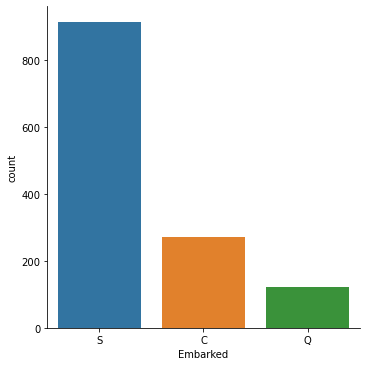

In [11]:
sns.catplot(x = 'Embarked', kind = 'count', data = df)

In [12]:
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4 

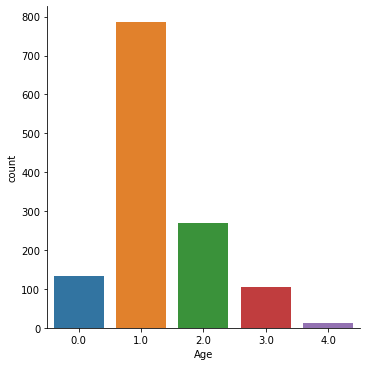

In [14]:
sns.catplot(x = 'Age', kind = 'count', data = df)

In [15]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [16]:
df['Title'] = df['Name'].apply(get_title)
df['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Ms.            2
Mlle.          2
Jonkheer.      1
Don.           1
Dona.          1
Countess.      1
Mme.           1
Lady.          1
Capt.          1
Sir.           1
Name: Title, dtype: int64

In [17]:
df['Title'] = df['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
df['Title'] = df['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
df['Title'] = df['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
df['Title'] = df['Title'].replace(['Mme.'], 'Mrs.')
df['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [18]:
#Cabin
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Cabin'] = df['Cabin'].str[0]
df['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [20]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [22]:
df['IsAlone'] = 0
df.loc[df['Family_Size']==1, 'IsAlone'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,M,S,Mr.,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,M,S,Miss.,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,M,S,Mr.,1,1


In [23]:
all_1 = df.drop(['Name', 'Ticket'], axis = 1)
all_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_Size,IsAlone
0,1,0.0,3,male,1.0,1,0,7.2500,M,S,Mr.,2,0
1,2,1.0,1,female,2.0,1,0,71.2833,C,C,Mrs.,2,0
2,3,1.0,3,female,1.0,0,0,7.9250,M,S,Miss.,1,1
3,4,1.0,1,female,2.0,1,0,53.1000,C,S,Mrs.,2,0
4,5,0.0,3,male,2.0,0,0,8.0500,M,S,Mr.,1,1


In [24]:
all_dummies = pd.get_dummies(all_1, drop_first = True)
all_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_male,...,Cabin_M,Cabin_T,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Officer.,Title_Royal.
0,1,0.0,3,1.0,1,0,7.2500,2,0,1,...,1,0,0,1,0,0,1,0,0,0
1,2,1.0,1,2.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,3,1.0,0,0,7.9250,1,1,0,...,1,0,0,1,0,1,0,0,0,0
3,4,1.0,1,2.0,1,0,53.1000,2,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,0.0,3,2.0,0,0,8.0500,1,1,1,...,1,0,0,1,0,0,1,0,0,0


In [25]:
all_train = all_dummies[all_dummies['Survived'].notna()]
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    float64
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Family_Size     891 non-null    int64  
 8   IsAlone         891 non-null    int64  
 9   Sex_male        891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [26]:
all_test = all_dummies[all_dummies['Survived'].isna()]
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Survived        0 non-null      float64
 2   Pclass          418 non-null    int64  
 3   Age             418 non-null    float64
 4   SibSp           418 non-null    int64  
 5   Parch           418 non-null    int64  
 6   Fare            418 non-null    float64
 7   Family_Size     418 non-null    int64  
 8   IsAlone         418 non-null    int64  
 9   Sex_male        418 non-null    uint8  
 10  Cabin_B         418 non-null    uint8  
 11  Cabin_C         418 non-null    uint8  
 12  Cabin_D         418 non-null    uint8  
 13  Cabin_E         418 non-null    uint8  
 14  Cabin_F         418 non-null    uint8  
 15  Cabin_G         418 non-null    uint8  
 16  Cabin_M         418 non-null    uint8  
 17  Cabin_T         418 non-null    uin

In [27]:
X = all_train.drop(['PassengerId','Survived'],axis=1)
y = all_train['Survived']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101,stratify = all_train['Survived'])

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
ada = AdaBoostClassifier(base_estimator=dtree,n_estimators=1000,learning_rate=0.001)

In [32]:
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.001,
                   n_estimators=1000)

In [33]:
y_pred = ada.predict(X_test)

In [34]:
print (f'Train Accuracy - : {ada.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test,y_test):.3f}')

Train Accuracy - : 0.961
Test Accuracy - : 0.746


In [35]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [36]:
t_pred = ada.predict(TestForPred).astype(int)

In [37]:
PassengerId = all_test['PassengerId']

In [38]:
adaSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })
adaSub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,0
